In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.modeling.functional_models import Gaussian2D

%matplotlib notebook

In [10]:
skymodel = pd.read_csv("A12_pipeline/skymodel/A-Team_AART.skymodel")

In [40]:
vi A12_pipeline/skymodel/A-Team_lowres.skymodel

SyntaxError: invalid syntax (<ipython-input-40-721eb59f9fef>, line 1)

In [32]:
Gaussian2D?

In [11]:
_ra = np.array([])
_dec = np.array([])

for source in ["CygA","CasA","TauA","VirA"]:
    coords = SkyCoord(ra=skymodel[skymodel["Patch"] == source].Ra, 
             dec=[x[:3]+":"+x[5:6]+":"+x[7:] for x in skymodel[skymodel["Patch"] == source].Dec], 
             unit=(u.hourangle, u.deg))
    _ra = np.append(_ra, coords.ra.deg)
    _dec = np.append(_dec, coords.dec.deg)
    
    

In [12]:
skymodel["_ra"] = _ra
skymodel["_dec"] = _dec
skymodel['radOr'] = np.deg2rad(skymodel["Orientation"])

<IPython.core.display.Javascript object>


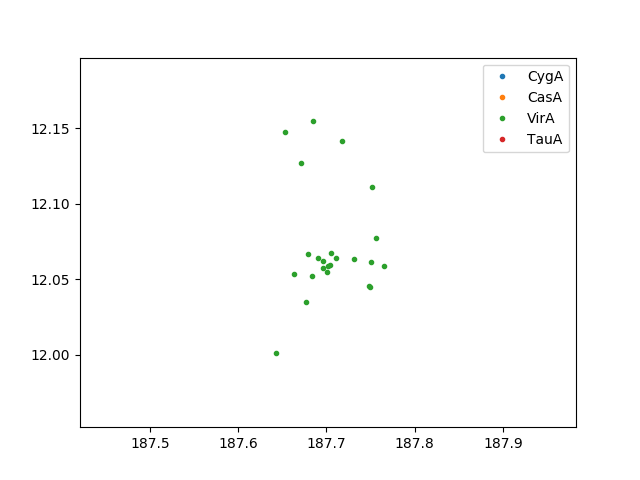

In [32]:

for source in ["CygA","CasA","TauA","VirA"]:
    coords = SkyCoord(ra=skymodel[skymodel["Patch"] == source].Ra, 
             dec=[x[:3]+":"+x[5:6]+":"+x[7:] for x in skymodel[skymodel["Patch"] == source].Dec], 
             unit=(u.hourangle, u.deg))
    
    plt.plot(coords.ra.deg, coords.dec.deg, ".", label=source)
    
plt.legend()

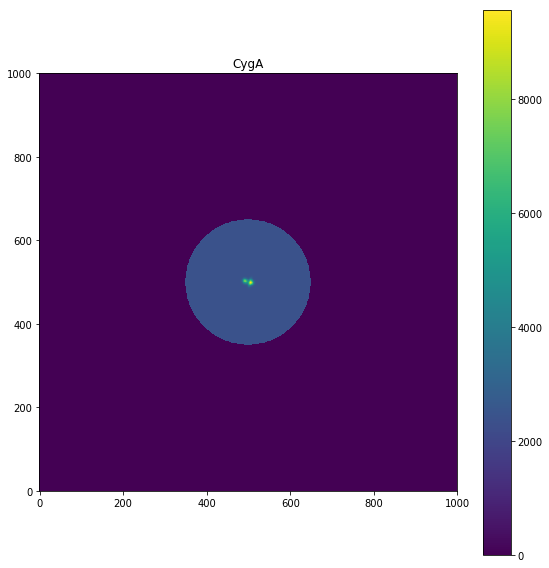

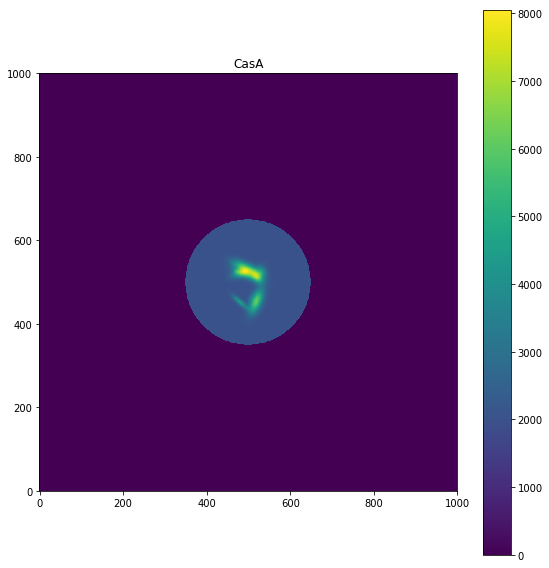

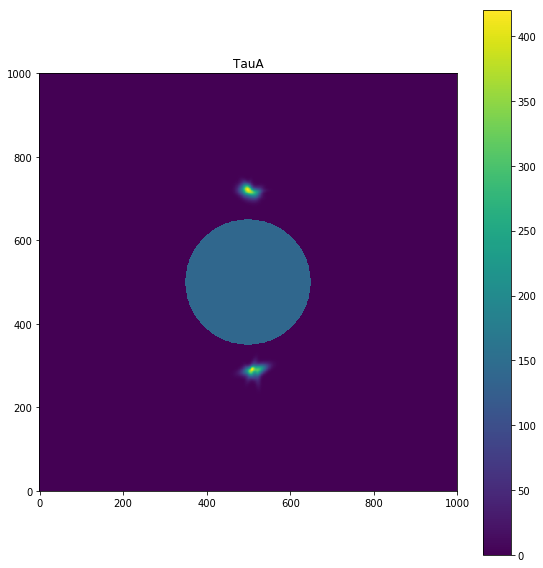

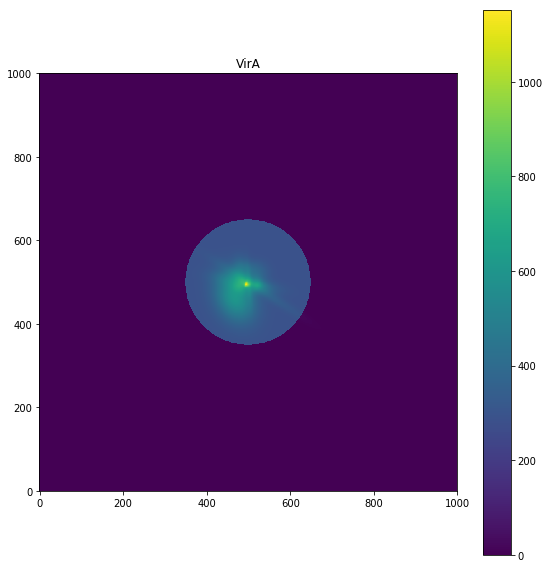

In [41]:

skymodel['radOr'] = np.deg2rad(-skymodel["Orientation"])

for source in ["CygA","CasA","TauA","VirA"]:

    source_ra = np.mean(skymodel[skymodel["Patch"] == source]._ra)
    source_dec = np.mean(skymodel[skymodel["Patch"] == source]._dec)

    grid_x, grid_y = np.meshgrid(np.linspace(source_ra-1,source_ra+1,1000),
                                 np.linspace(source_dec-1,source_dec+1,1000))

    sky = np.zeros([1000,1000])
    
    for i in range(np.sum(skymodel["Patch"] == source)):

        I,_ra,_dec,MajorAxis,MinorAxis,radOr = skymodel[["I","_ra","_dec","MajorAxis","MinorAxis","radOr"]][skymodel["Patch"] == source].iloc[i].values


        sky += Gaussian2D().evaluate(grid_x,grid_y, I,_ra,_dec,MajorAxis,MinorAxis,radOr)
        
        
    sky[ np.sqrt((grid_x - source_ra)**2. + (grid_y - source_dec)**2.) < 0.3 ] += np.max(sky)/3
    plt.figure(figsize=(8,8))
    plt.title(source)
    plt.imshow(sky, origin="lower")

    plt.colorbar()
    plt.tight_layout()
    plt.show()
    

In [16]:
np.sqrt((grid_x - 500)**2. + (grid_y - 500)**2.) == 100

NameError: name 'grid_x' is not defined

In [31]:
skymodel[["MajorAxis","MinorAxis","Orientation"]]


,MajorAxis,MinorAxis,Orientation
0,0.007639,0.006944,100.63700
1,0.012052,0.005340,103.23000
2,0.007639,0.006944,92.10610
3,0.007639,0.006944,67.49220
4,0.007639,0.006944,0.00000
5,0.043266,0.017928,27.32070
6,0.042596,0.018778,112.51600
7,0.027774,0.014266,62.60620
8,0.031545,0.009029,41.18570
9,0.022593,0.017087,84.80560


In [122]:
_ra, _dec

(187.6432625, 12.001114444444445)

In [76]:
skymodel[["I","_ra","_dec","MajorAxis","MinorAxis","radOr"]][skymodel["Patch"] == source].iloc[0].values

array([3.21900000e+02, 1.87643262e+02, 1.20011144e+01, 8.42972000e-02,
       6.11535000e-02, 1.13509931e+00])

In [69]:
skymodel[["I","_ra"]]

,I,_ra
0,4827.0000,299.876804
1,4165.0000,299.868650
2,3896.0000,299.842367
3,2798.0000,299.851721
4,156.0000,299.856479
5,4193.0000,350.837683
6,4131.0000,350.891325
7,2536.0000,350.891800
8,2316.0000,350.813717
9,2245.0000,350.915133
